In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#load_data
dataset = pd.read_csv('transcoding_mesurment.tsv', sep='\t')

#see all feature
print(dataset.keys())

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')


In [9]:
#convert data to data frame
dataframe = pd.DataFrame(dataset)
dataframe.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [10]:
#check missing value
dataframe.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

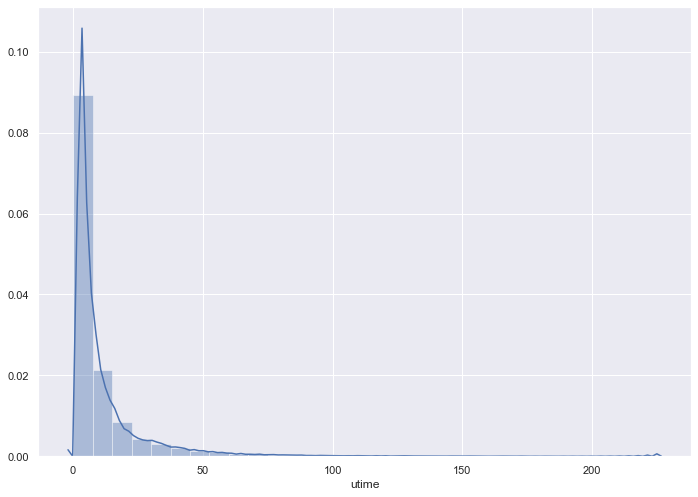

In [13]:
#plotting to analyze data distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataframe['utime'], bins = 30)
plt.show()

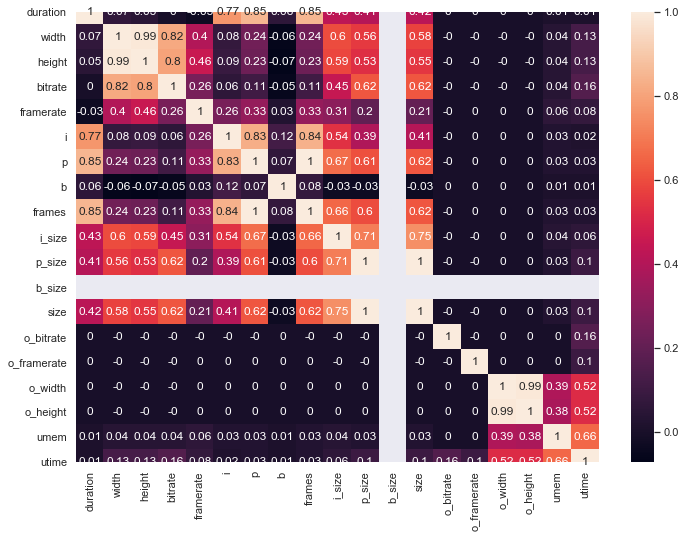

In [15]:
#correlation matrix to measure the linear relationship between features
feature_corr = dataframe.corr().round(2)
sns.heatmap(data=feature_corr, annot=True)

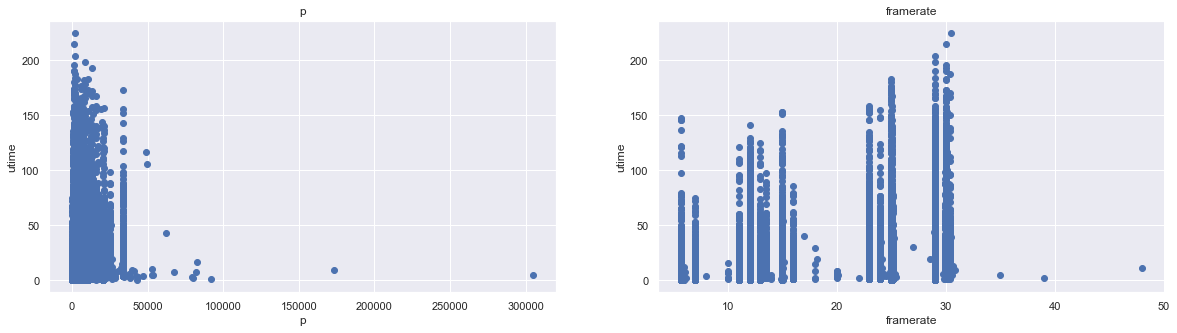

In [16]:
plt.figure(figsize=(20, 5))

# feature to predict
target = dataframe['utime']

# selected features is feature that have high correlation with utime
# RM have high positive correlation with utime(0.7)
# LSTAT have high negative correlation with utime(-0.74)
selected_features = ['p', 'framerate']

# draw scatter plot to see how selected_features vary with utime
for i, col in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    x = dataframe[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('utime')

In [17]:
# data training
X = pd.DataFrame(np.c_[dataframe['p'], dataframe['framerate']], columns = ['p','framerate'])
Y = dataframe['utime']

In [18]:
# library for split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

In [19]:
# library for train model using linear regression
from sklearn.linear_model import LinearRegression

# library for evaluate model using RMSE and R2-Score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# make and train model
model = LinearRegression()
model.fit(X_train, Y_train)


# evaluation for data training
Y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mse(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)

print("Training : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

# evaluation for daya testing
Y_test_predict = model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mse(Y_test, Y_test_predict)))
# R-square score of the model
r2 = r2_score(Y_test, Y_test_predict)

print("Testing : ")
print('RMSE : ', rmse)
print('R2 : ',r2)
print("\n")

Training : 
RMSE :  16.031767471436556
R2 :  0.006462087467040356


Testing : 
RMSE :  16.1539109866305
R2 :  0.005768556759400911




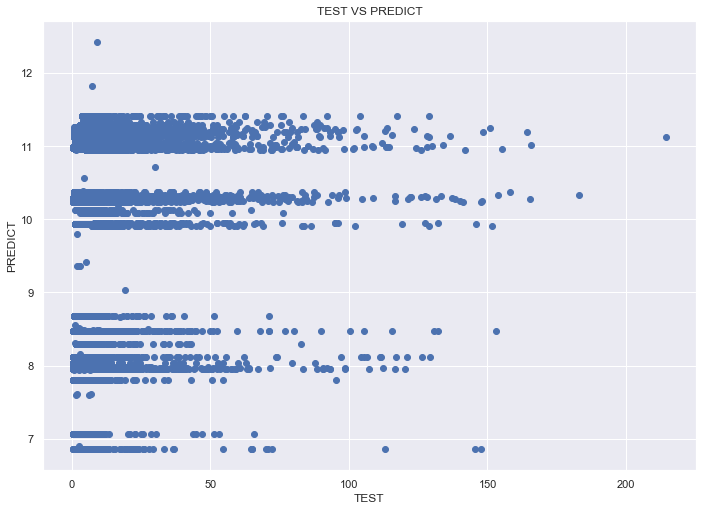

In [20]:
# plort Y_test VS Y_test_predict
plt.scatter(Y_test, Y_test_predict)
plt.xlabel('TEST')
plt.ylabel('PREDICT')
plt.title('TEST VS PREDICT')
plt.show()